In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color = [x / 255. for x in [31,119,189]]
alpha = 153/255.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


FileNotFoundError: [Errno 2] No such file or directory: 'output/Figure-2a.pdf'

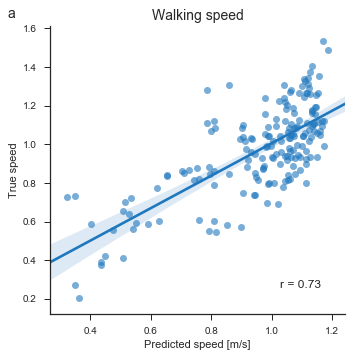

In [2]:
data_ad = pd.read_csv("fig_data/Fig2a-d.csv")
variables = ['speed','cadence','KneeFlex_maxExtension','GDI']
titles = ['Walking speed','Cadence','Knee flexion at maximum extension','Gait deviation index (GDI)']
xaxis = ['Predicted speed [m/s]','Predicted cadence [steps/s]','Predicted knee flexion [degrees]','Predicted GDI']
yaxis = ['True speed','True cadence','True knee flexion','True GDI']
subplot = ['a','b','c','d']

for key in range(4):
    var = variables[key]    
    sns.set(rc={'figure.figsize':(5.3,5.3),'axes.titlesize': 14})
    sns.set_style("ticks")
    corr = data_ad.corr()['%s_pred_corrected' % var][var]
    
    ax = sns.regplot(data_ad['%s_pred_corrected' % var],
                     data_ad[var],
                     color=color, 
                     scatter_kws={'alpha':alpha}
                    )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel(xaxis[key])
    plt.ylabel(yaxis[key])
    plt.title(titles[key])

    plt.text(-0.13, 1.04, subplot[key],
             horizontalalignment='center',verticalalignment='center',
             transform=ax.transAxes,size=14)

    vmin = data_ad[['%s_pred_corrected' % var,var]].min().min()
    vmax = data_ad[['%s_pred_corrected' % var,var]].max().max()

    plt.text(0.85, 0.1, "r = %.2f" % (corr), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.savefig("output/Figure-2%s.pdf" % subplot[key], bbox_inches="tight",pad_inches=0.1)
    plt.show()

In [ ]:
data_e = pd.read_csv("fig_data/Fig2e.csv")
sns.set(rc={'figure.figsize':(5.3,5.3),'axes.titlesize': 14})
sns.set_style("ticks")
ax = sns.regplot(data_e["predicted_asym"],
                 data_e["true_asym"],
                 color=color, 
                 scatter_kws={'alpha':alpha})

plt.text(0.85, 0.1, "r = %.2f" % (data_e.corr()["predicted_asym"]["true_asym"]), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(-0.13, 1.04, "e",
         horizontalalignment='center',verticalalignment='center',
         transform=ax.transAxes,size=14)

plt.xlabel("Predicted asymmetry")
plt.ylabel("True asymmmetry")
plt.title("Asymmetry in GDI")
plt.savefig("output/Figure-2e.pdf",bbox_inches="tight",pad_inches=0.1)

plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


FileNotFoundError: [Errno 2] No such file or directory: 'output/Figure-2f.pdf'

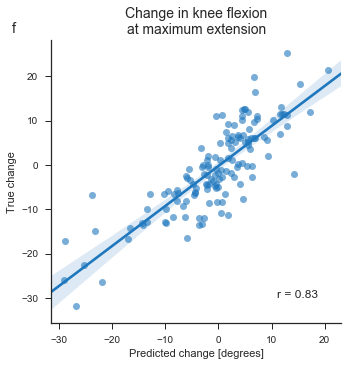

In [3]:
files = ["Fig2f.csv", "Fig2g.csv"]
variables = ["KneeFlex_maxExtension", "GDI"]
titles = ['Change in knee flexion\nat maximum extension','Change in GDI']
xlabel = ['Predicted change [degrees]','Predicted change']
ylabel = ['True change','True change']
subplot = ['f','g']

for key in range(2):
    var = variables[key]
    data =\
        pd.read_csv("fig_data/%s" % files[key])

    sns.set(rc={'figure.figsize':(5.2,5.2),'axes.titlesize': 14})
    sns.set_style("ticks")

    corr = data.corr()["Diff%s" % var]["pred"]
    ax = sns.regplot(data["pred"],
                     data["Diff%s" % var],
                     color=color, 
                     scatter_kws={'alpha':alpha})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.text(0.85, 0.1, "r = %.2f" % corr,
             horizontalalignment='center',verticalalignment='center',
             transform=ax.transAxes)
    plt.text(-0.13, 1.04, subplot[key],
             horizontalalignment='center',verticalalignment='center',
             transform=ax.transAxes,size=14)

    plt.xlabel(xlabel[key])
    plt.ylabel(ylabel[key])
    plt.title(titles[key])
    plt.savefig("output/Figure-2%s.pdf" % subplot[key],bbox_inches="tight",pad_inches=0.1)
    plt.show()